In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import os

In [8]:
# Load the original data
df = pd.read_csv(r"data/raw/Housing/data.csv")
df['date'] = pd.to_datetime(df['date'])
df['age'] = df['date'].dt.year - df['yr_built']
df['age_renovated'] = np.where(df['yr_renovated'] > 0, df['date'].dt.year - df['yr_renovated'], df['age'])

label_encoder = LabelEncoder()
df['statezip'] = label_encoder.fit_transform(df['statezip'])
df['street'] = label_encoder.fit_transform(df['street'])
df['city'] = label_encoder.fit_transform(df['city'])
df['country'] = label_encoder.fit_transform(df['country'])

df.drop(['date'], axis=1, inplace=True)

# Split the original data into features and target
xreal = df.drop("price", axis=1)
yreal = df["price"]

# Split the original data into train and test sets
xtrainr, xtestr, ytrainr, ytestr = train_test_split(xreal, yreal, test_size=0.2, random_state=9046)

None


In [9]:
# Train a linear regression model on the original data
model = LinearRegression()
model.fit(xtrainr, ytrainr)
ypred = model.predict(xtestr)
r2s_real = r2_score(ytestr, ypred)
print("Max R2 score of real data (train on real, test on real):", r2s_real)

Max R2 score of real data (train on real, test on real): 0.6474026149165756


In [10]:
# Load the synthetic data
df = pd.read_csv("data/raw/Housing/new data.csv")
df['date'] = pd.to_datetime(df['date'])
df['age'] = df['date'].dt.year - df['yr_built']
df['age_renovated'] = np.where(df['yr_renovated'] > 0, df['date'].dt.year - df['yr_renovated'], df['age'])

label_encoder = LabelEncoder()
df['statezip'] = label_encoder.fit_transform(df['statezip'])
df['street'] = label_encoder.fit_transform(df['street'])
df['city'] = label_encoder.fit_transform(df['city'])
df['country'] = label_encoder.fit_transform(df['country'])

df.drop(['date'], axis=1, inplace=True)

# Split the synthetic data into features and target
x = df.drop("price", axis=1)
y = df["price"]

In [11]:
# Train a linear regression model on the synthetic data and test on the original test set
model = LinearRegression()
model.fit(x, y)
ypred = model.predict(xtestr)
r2s_synthetic = r2_score(ytestr, ypred)
print("Synthetic data training, real data testing (test on real):", r2s_synthetic)

# Combine the original train set and the synthetic data
x = pd.concat([xtrainr, x], axis=0)
y = pd.concat([ytrainr, y], axis=0)

# Train a linear regression model on the combined data and test on the original test set
model = LinearRegression()
model.fit(x, y)
ypred = model.predict(xtestr)
r2s_combined = r2_score(ytestr, ypred)
print("Real + synthetic data training, real data testing (test on real):", r2s_combined)

Synthetic data training, real data testing (test on real): 0.4212580401709558
Real + synthetic data training, real data testing (test on real): 0.5988795780720796


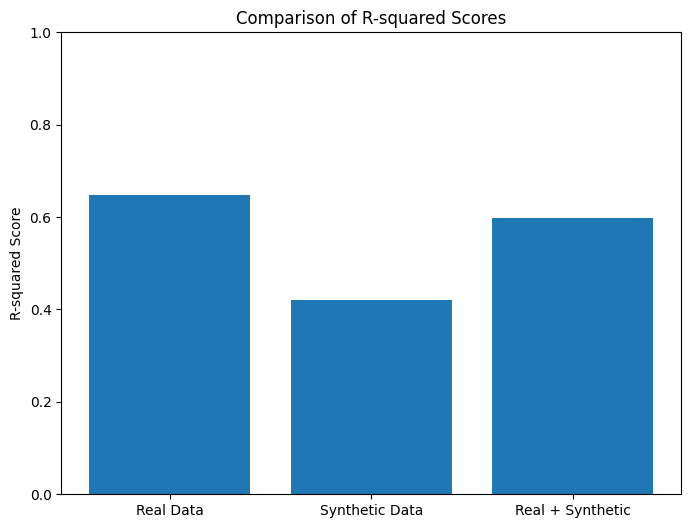

In [12]:
# Plot the R-squared scores
scores = [r2s_real, r2s_synthetic, r2s_combined]
labels = ["Real Data", "Synthetic Data", "Real + Synthetic"]

plt.figure(figsize=(8, 6))
plt.bar(labels, scores)
plt.ylim(0, 1)
plt.ylabel("R-squared Score")
plt.title("Comparison of R-squared Scores")
plt.show()